# Appendix C Data 


In [70]:
suppressPackageStartupMessages(library(tidyverse))

## C.1 Data importation

The first step in data analysis is to load the data set into your workspace. We will examine comma-separated value (CSV) data  and data from the Internet in this section. 

### C.1.1 Comma-separated value

CSV is one of the most common formats for sharing data. The CSV data has the advantage of being human-readable. The disadvantage is that there is no actual standard for reading or writing these files.
Here's an example of CSV data on heights:
    
    "earn","height","sex","ed","age","race"
    50000,74.4244387818035,"male",16,45,"white"
    60000,65.5375428255647,"female",16,58,"white"
    30000,63.6291977374349,"female",16,29,"white"
    50000,63.1085616752971,"female",16,91,"other"
    51000,63.4024835710879,"female",17,39,"white"
    9000,64.3995075440034,"female",15,26,"white"
    
The first row (usually) has a *header* giving the column names. Subsequent rows give the actual data. Strings are (usually) quoted.

We might also see these data come in the format:
    
    earn,height,sex,ed,age,race
    50000,74.4244387818035,male,16,45,white
    60000,65.5375428255647,female,16,58,white
    30000,63.6291977374349,female,16,29,white
    50000,63.1085616752971,female,16,91,other
    51000,63.4024835710879,female,17,39,white
    9000,64.3995075440034,female,15,26,white
    
There are no quotes!

Or even:

    50000,74.4244387818035,male,16,45,white
    60000,65.5375428255647,female,16,58,white
    30000,63.6291977374349,female,16,29,white
    50000,63.1085616752971,female,16,91,other
    51000,63.4024835710879,female,17,39,white
    9000,64.3995075440034,female,15,26,white
    
No column names!

The `read_csv` command is designed to read this type of file. Note that this command is part of `tidyverse` and is **not** the `read.csv` in `R`. We generally want to use `read_csv` over `read.csv` since (i) it is much faster and (ii) it outputs nicely formatted `tibble`s which you can pass into other `tidyverse` functions.

In [2]:
heights <- read_csv("../Data/heights.csv") %>% print

Rows: 1192 Columns: 6
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): sex, race
dbl (4): earn, height, ed, age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,192 × 6
    earn height sex       ed   age race    
   <dbl>  <dbl> <chr>  <dbl> <dbl> <chr>   
 1 50000   74.4 male      16    45 white   
 2 60000   65.5 female    16    58 white   
 3 30000   63.6 female    16    29 white   
 4 50000   63.1 female    16    91 other   
 5 51000   63.4 female    17    39 white   
 6  9000   64.4 female    15    26 white   
 7 29000   61.7 female    12    49 white   
 8 32000   72.7 male      17    46 white   
 9  2000   72.0 male      15    21 hispanic
10 27000   72.2 male      12    26 white   
# ℹ 1,182 more rows


Here `read_csv` has told us what columns it found, and also what the data types it found for them are. Generally these will be correct but we will see examples later where it guesses wrongly and we have to manually override them.

Here is another version of `heights`, where we are not fortunate enough to have a header telling us which columns came from where. 

In [5]:
read_csv("../Data/heights_no_hdr.csv") %>% print

Rows: 1191 Columns: 6
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): male, white
dbl (4): 50000, 74.4244387818035, 16, 45

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,191 × 6
   `50000` `74.4244387818035` male    `16`  `45` white   
     <dbl>              <dbl> <chr>  <dbl> <dbl> <chr>   
 1   60000               65.5 female    16    58 white   
 2   30000               63.6 female    16    29 white   
 3   50000               63.1 female    16    91 other   
 4   51000               63.4 female    17    39 white   
 5    9000               64.4 female    15    26 white   
 6   29000               61.7 female    12    49 white   
 7   32000               72.7 male      17    46 white   
 8    2000               72.0 male      15    21 hispanic
 9   27000               72.2 male      12    26 white   
10    6530               69.5 male      16    65 white   
# ℹ 1,181 more rows


Now `read_csv()` has erroneously assumed that the first row of data are the header names. To override this behavior, we need to specify the column names by hand. 

In [4]:
read_csv("../Data/heights_no_hdr.csv", col_names = F) %>% print

Rows: 1192 Columns: 6
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): X3, X6
dbl (4): X1, X2, X4, X5

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,192 × 6
      X1    X2 X3        X4    X5 X6      
   <dbl> <dbl> <chr>  <dbl> <dbl> <chr>   
 1 50000  74.4 male      16    45 white   
 2 60000  65.5 female    16    58 white   
 3 30000  63.6 female    16    29 white   
 4 50000  63.1 female    16    91 other   
 5 51000  63.4 female    17    39 white   
 6  9000  64.4 female    15    26 white   
 7 29000  61.7 female    12    49 white   
 8 32000  72.7 male      17    46 white   
 9  2000  72.0 male      15    21 hispanic
10 27000  72.2 male      12    26 white   
# ℹ 1,182 more rows


In [6]:
read_csv("../Data/heights_no_hdr.csv", 
         col_names = c("earn", "height", "sex", "ed", "age", "race")) %>% print

Rows: 1192 Columns: 6
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): sex, race
dbl (4): earn, height, ed, age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,192 × 6
    earn height sex       ed   age race    
   <dbl>  <dbl> <chr>  <dbl> <dbl> <chr>   
 1 50000   74.4 male      16    45 white   
 2 60000   65.5 female    16    58 white   
 3 30000   63.6 female    16    29 white   
 4 50000   63.1 female    16    91 other   
 5 51000   63.4 female    17    39 white   
 6  9000   64.4 female    15    26 white   
 7 29000   61.7 female    12    49 white   
 8 32000   72.7 male      17    46 white   
 9  2000   72.0 male      15    21 hispanic
10 27000   72.2 male      12    26 white   
# ℹ 1,182 more rows


To create short examples illustrating `read_csv`'s behavior, we can specify the contents of a csv file inline.

In [7]:
read_csv(
    "a, b, c
     1, 2, 3
     4, 5, 6
")

Rows: 2 Columns: 3
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): a, b, c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


We might want to skip a few rows in the beginning that have metadata.

In [8]:
read_csv(
"# First row to skip
// Second row to skip
% Third row to skip
a, b, c
1, 2, 3
4, 5, 6
", skip = 3)

Rows: 2 Columns: 3
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): a, b, c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


Some CSVs will come with comments, typically in the form of lines prefaced by `#`. We can also skip comments line by specifying a comment character.

In [13]:
read_csv("
# First comment line
a, b, c
# This separate the header from the data
1, 2, 3
4, 5, 6
# Another comment line
", comment = '#')

a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


Set `col_names = FALSE` when you don't have column names in the file. The column names are then set to X1, X2, ...

In [14]:
read_csv("
1, 2, 3
4, 5, 6
") %>% print

# A tibble: 1 x 3
    `1`   `2`   `3`
  <dbl> <dbl> <dbl>
1     4     5     6


We can specify our own column names.

In [15]:
read_csv("
1, 2, 3
4, 5, 6
", col_names = c("a", "b", "c"))

a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


We can specify how missing values are represented in the file.

In [16]:
read_csv(
    "a, b, c
     1, 2, 3
     4,  , 6
") %>% print

# A tibble: 2 x 3
      a     b     c
  <dbl> <dbl> <dbl>
1     1     2     3
2     4    NA     6


In [17]:
read_csv(
    "a, b, c
     1, 2, 3
     4, -1, 6
", na = "-1") %>% print

# A tibble: 2 x 3
      a     b     c
  <dbl> <dbl> <dbl>
1     1     2     3
2     4    NA     6


We can save a `data.frame` to a `.csv` file using `write_csv()`.

In [24]:
cubes <- data.frame(cbind(1:10,(1:10)^2,(1:10)^3))
colnames(cubes) <- c("1st","2nd","3rd")

In [25]:
cubes %>% print
write_csv(cubes, "../Data/cubes.csv")

   1st 2nd  3rd
1    1   1    1
2    2   4    8
3    3   9   27
4    4  16   64
5    5  25  125
6    6  36  216
7    7  49  343
8    8  64  512
9    9  81  729
10  10 100 1000


In [26]:
cat(read_file('../Data/cubes.csv'))

1st,2nd,3rd
1,1,1
2,4,8
3,9,27
4,16,64
5,25,125
6,36,216
7,49,343
8,64,512
9,81,729
10,100,1000


In [9]:
cubes2 <- read_csv("../Data/cubes.csv")
print(cubes2)

Rows: 10 Columns: 3
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): 1st, 2nd, 3rd

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 10 × 3
   `1st` `2nd` `3rd`
   <dbl> <dbl> <dbl>
 1     1     1     1
 2     2     4     8
 3     3     9    27
 4     4    16    64
 5     5    25   125
 6     6    36   216
 7     7    49   343
 8     8    64   512
 9     9    81   729
10    10   100  1000


### C.1.2 Web scraping

These days, it's increasingly common to pull data from online sources. For example, say we wanted to know the population of European countries. This is [easily found](https://en.wikipedia.org/wiki/Demographics_of_Europe) on Wikipedia. We may want to analyze this kind of data in `R`. We can use the package `htmltab` to scrap data from the Internet. 

In [71]:
# Load the rvest package
library(rvest)

In [72]:
# Specify the URL
url <- "https://en.wikipedia.org/wiki/Demographics_of_Europe"

# Read the HTML content of the webpage
webpage <- read_html(url)

# Extract all tables on the page
tables <- webpage %>% html_nodes("table")
#tables <- html_nodes(webpage , "table")


In [73]:
typeof(tables)
length(tables)

[1] "list"

[1] 18

In [76]:
tables[[1]]

{html_node}
<table class="wikitable">
[1] <tbody>\n<tr>\n<th rowspan="2">Year\n</th>\n<th colspan="2">Population\n< ...

Let's look at the population table.

In [78]:
# Select a specific table by index (e.g., the 2nd table)
(pop <- tables[[2]] %>% html_table(fill = TRUE))

Country/region,1,1000,1500,1600,1700,1820,1870,1913,1950,1973,1998,2020
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Austria,500[9],700[9],2000[9],2500[9],2500[9],3369[9],4520[9],6767[9],6935[9],7586[9],8078[9],8901[9]
Belgium,300[9],400[9],1400[9],1600[9],2000[9],3424[9],5096[9],7666[9],8640[9],9738[9],10197[9],11493[9]
Denmark,180[9],360[9],600[9],650[9],700[9],1155[9],1888[9],2983[9],4269[9],5022[9],5303[9],5823[9]
Finland,20[9],40[9],300[9],400[9],400[9],1169[9],1754[9],3027[9],4009[9],4666[9],5153[9],5536[9]
France,5000[9],6500[9],15000[9],18500[9],21471[9],31246[9],38440[9],41463[9],41836[9],52118[9],58805[9],67287[9]
Germany,3000[9],3500[9],12000[9],16000[9],15000[9],24905[9],39231[9],65058[9],68371[9],78956[9],82029[9],83191[9]
Italy,7000[9],5000[9],10500[9],13100[9],13300[9],20176[9],27888[9],37248[9],47105[9],54751[9],57592[9],59258[9]
Netherlands,200[9],300[9],950[9],1500[9],1900[9],2355[9],3615[9],6164[9],10114[9],13438[9],15700[9],17425[9]
Norway,100[9],200[9],300[9],400[9],500[9],970[9],1735[9],2447[9],3265[9],3961[9],4432[9],5368[9]


This did not produce what we want. A quick look at the webpage shows that the `[9]` should not be included in the final table.

In [79]:
# Clean the table by removing square bracket references
pop_cleaned <- as_tibble(
  lapply(pop, function(x) {
    if (is.character(x)) {
      # Remove text within square brackets
      x=gsub("\\[.*?\\]", "", x)
    } else {
      x
    }
  })
)
pop_cleaned

Country/region,1,1000,1500,1600,1700,1820,1870,1913,1950,1973,1998,2020
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Austria,500,700,2000,2500,2500,3369,4520,6767,6935,7586,8078,8901
Belgium,300,400,1400,1600,2000,3424,5096,7666,8640,9738,10197,11493
Denmark,180,360,600,650,700,1155,1888,2983,4269,5022,5303,5823
Finland,20,40,300,400,400,1169,1754,3027,4009,4666,5153,5536
France,5000,6500,15000,18500,21471,31246,38440,41463,41836,52118,58805,67287
Germany,3000,3500,12000,16000,15000,24905,39231,65058,68371,78956,82029,83191
Italy,7000,5000,10500,13100,13300,20176,27888,37248,47105,54751,57592,59258
Netherlands,200,300,950,1500,1900,2355,3615,6164,10114,13438,15700,17425
Norway,100,200,300,400,500,970,1735,2447,3265,3961,4432,5368


Finally, we need to turn `chr` (characters) into numeric values. 

In [80]:
pop_cleaned[, -1]<-lapply(pop_cleaned[, -1], as.numeric)

In [81]:
pop_cleaned

Country/region,1,1000,1500,1600,1700,1820,1870,1913,1950,1973,1998,2020
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Austria,500,700,2000,2500,2500,3369,4520,6767,6935,7586,8078,8901
Belgium,300,400,1400,1600,2000,3424,5096,7666,8640,9738,10197,11493
Denmark,180,360,600,650,700,1155,1888,2983,4269,5022,5303,5823
Finland,20,40,300,400,400,1169,1754,3027,4009,4666,5153,5536
France,5000,6500,15000,18500,21471,31246,38440,41463,41836,52118,58805,67287
Germany,3000,3500,12000,16000,15000,24905,39231,65058,68371,78956,82029,83191
Italy,7000,5000,10500,13100,13300,20176,27888,37248,47105,54751,57592,59258
Netherlands,200,300,950,1500,1900,2355,3615,6164,10114,13438,15700,17425
Norway,100,200,300,400,500,970,1735,2447,3265,3961,4432,5368


To get the data into a usable format we need to do a bit more work. 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_col()`).”


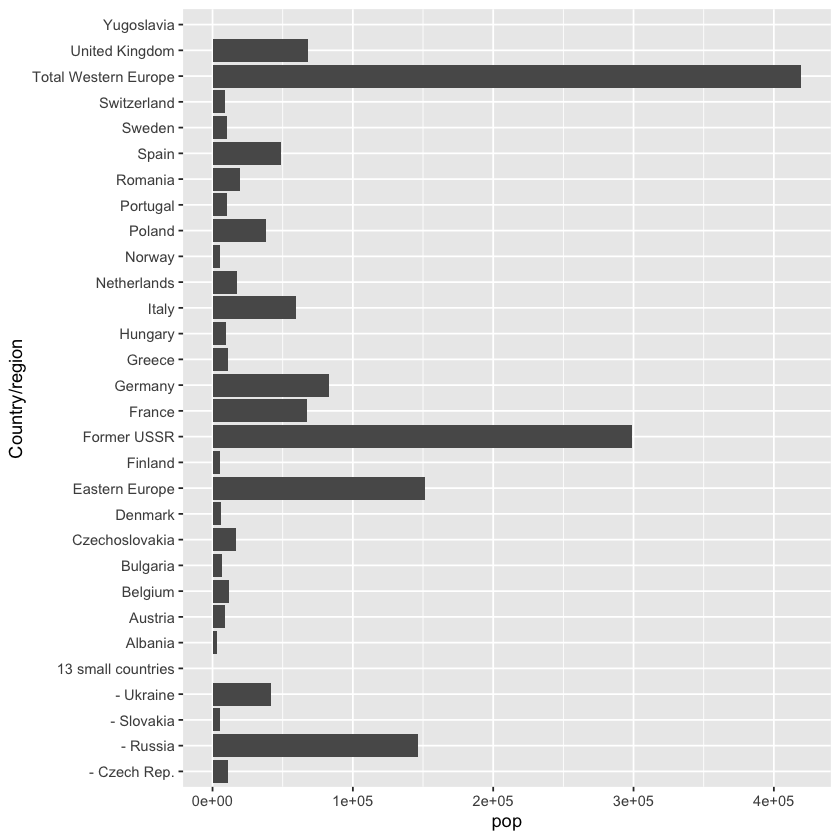

In [82]:
pop_cleaned %>% filter(`Country/region`!='World') %>% 
    mutate(pop = as.integer(gsub(",", "", `2020`))) %>% 
    ggplot + geom_col(aes(x=`Country/region`, y=pop)) + coord_flip()

In making the plot above, we use quite a few new commands. We will learn more about data manipulations in the following sections, and we will formally introduce `ggplot2` in Chapter 2.

## C.2 Data manipulation
Manipulating data is an important part of data science, and there are a lot of built-in commands for doing it in R:
```
subset()
aggregate()
merge()
reshape()
```
These commands can be difficult to use. Instead of the traditional commands, we are going to focus on the `dplyr` package for filtering data. They provide a nice suite of replacements for the traditional commands, which have a consistent, unified interface and interoperate nicely with each other.

The `dplyr` package is part of `tidyverse`, and we can just load up the `tidyverse` package to use tools in `dplyr`.

We will be using the `nycflights13` data set for this lecture. It does not come with tidyverse.  This data set is about flights departing from the NYC area in 2013. 

In [83]:
# install.packages('nycflights13')
library(nycflights13)

In [87]:
print(flights)

# A tibble: 336,776 × 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# ℹ 336,766 more rows
# ℹ 1

Here we will interpret `tibble` simply as a dataframe. More information can be found in the document here [(link)](https://tibble.tidyverse.org/).

Notice the types of the variables above. They include:

* **int** integers
* **dbl** double precision floating point numbers
* **chr** character vectors, or strings
* **dttm** date-time (a date along with a time)

Other types available in `R` but not represented above include:

* **lgl** logical (either `TRUE` or `FALSE`)
* **fctr** factor (categorical variable with a fixed number of possible values)
* **date** date

### C.2.1 Filtering 
The first operation we'll learn about is filtering. Filtering is interpereted to mean "keep only the rows which match these criteria". The syntax for the `filter` command is 
```{r}
filter(<TIBBLE>, <LOGICAL CRITERIA>)
```
This commands returns a new tibble whose rows all match the specified criteria.

For those who are new to programming, we now briefly review the sorts of logical operations that you can specify for commands like `filter()`. The basic logical operators in R are `>`, `>=`, `<`, `<=`, `!=` (not equal), and `==` (equal). The first four are used for comparing numbers and function exactly as in mathematics. Do not confuse `==` with `=`! 


In [16]:
1 > 1
1 >= 1
2.5 < 3
2.5 <= 3

1 == 1
1 = 1

[1] FALSE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

ERROR: Error in 1 = 1: invalid (do_set) left-hand side to assignment


Logical expressions are combined using *boolean operations*. The basic boolean operations are `and`, `or`, and `not`, denoted `&`, `|` and `!` respectively. There are also doubled versions of `&` and `|` denoted `&&` and `||`. 

In [17]:
! FALSE
FALSE | TRUE
! TRUE

[1] TRUE

[1] TRUE

[1] FALSE

Another useful operator is `%in%`:
```r
x %in% y
```

return `TRUE` if the value `x` is found in the vector `y`:

In [18]:
"a" %in% c(1, 2, 3)

("a" == 1) | ("a" == 2) | ("a" == 3)

[1] FALSE

[1] FALSE

Something we will often encounter when working with real data are missing observations. `R` has a special value, `NA` , for representing missing data.  Since we cannot test `NA`s for equality, `R` has a special function for determining whether a value is `NA`.

In [19]:
5 == NA

is.na(NA)
is.na(1)

[1] NA

[1] TRUE

[1] FALSE

Let's use what we have just learned to evaluate some simple queries on the `flights` dataset. Let's first narrow down to all flights that departed on December 31.

In [20]:
month == 12 & day == 31

ERROR: Error in month == 12: comparison (==) is possible only for atomic and list types


In [22]:
#filter(flights, month == 12 & day == 31) 

#filter(flights, flights$month == 12 & flights$day == 31)

An alternative way is to use multiple arguments in `filter`.  `R` will interpret multiple arugments as `AND` in the `filter` function.

In [90]:
#filter(flights, month == 12 & day == 31) 
filter(flights, month == 12, day == 31, dep_time==18) 

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,12,31,18,2359,19,449,444,5,DL,412,N713TW,JFK,SJU,192,1598,23,59,2013-12-31 23:00:00


The above code just displayed the filtered rows. We can save the filtered rows into a new `tibble`. 

In [95]:
dec31 <- filter(flights, month == 12 & day == 31)
print(dec31)

# A tibble: 776 × 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    12    31       13           2359        14      439            437
 2  2013    12    31       18           2359        19      449            444
 3  2013    12    31       26           2245       101      129           2353
 4  2013    12    31      459            500        -1      655            651
 5  2013    12    31      514            515        -1      814            812
 6  2013    12    31      549            551        -2      925            900
 7  2013    12    31      550            600       -10      725            745
 8  2013    12    31      552            600        -8      811            826
 9  2013    12    31      553            600        -7      741            754
10  2013    12    31      554            550         4     1024           1027
# ℹ 766 more rows
# ℹ 11 more v

If we want to assign as well as print, enclose the command in parentheses.

In [96]:
( dec31 <- filter(flights, month == 12 & day == 31) )

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,12,31,13,2359,14,439,437,2,B6,839,N566JB,JFK,BQN,189,1576,23,59,2013-12-31 23:00:00
2013,12,31,18,2359,19,449,444,5,DL,412,N713TW,JFK,SJU,192,1598,23,59,2013-12-31 23:00:00
2013,12,31,26,2245,101,129,2353,96,B6,108,N374JB,JFK,PWM,50,273,22,45,2013-12-31 22:00:00
2013,12,31,459,500,-1,655,651,4,US,1895,N557UW,EWR,CLT,95,529,5,0,2013-12-31 05:00:00
2013,12,31,514,515,-1,814,812,2,UA,700,N470UA,EWR,IAH,223,1400,5,15,2013-12-31 05:00:00
2013,12,31,549,551,-2,925,900,25,UA,274,N577UA,EWR,LAX,346,2454,5,51,2013-12-31 05:00:00
2013,12,31,550,600,-10,725,745,-20,AA,301,N3CXAA,LGA,ORD,127,733,6,0,2013-12-31 06:00:00
2013,12,31,552,600,-8,811,826,-15,EV,3825,N14916,EWR,IND,118,645,6,0,2013-12-31 06:00:00
2013,12,31,553,600,-7,741,754,-13,DL,731,N333NB,LGA,DTW,86,502,6,0,2013-12-31 06:00:00


Let's filter down to all flights which were in the last quarter of the year (October through December). That is, we want flights whose `month` is 10, 11, or 12.

In [29]:
print(filter(flights, month %in% c(10, 11, 12)))

# A tibble: 84,292 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    10     1      447            500       -13      614            648
 2  2013    10     1      522            517         5      735            757
 3  2013    10     1      536            545        -9      809            855
 4  2013    10     1      539            545        -6      801            827
 5  2013    10     1      539            545        -6      917            933
 6  2013    10     1      544            550        -6      912            932
 7  2013    10     1      549            600       -11      653            716
 8  2013    10     1      550            600       -10      648            700
 9  2013    10     1      550            600       -10      649            659
10  2013    10     1      551            600        -9      727            730
# ... with 84,282 more rows,

We can save some typing by using the `%in%` operator as well as the `:` (colon) operator. The colon operator takes two integers and returns a vector of all the integers between them: `a:b = c(a,a+1,...,b-1,b)`.

In [24]:
filter(flights, month %in% 10:12) # Flight from October through December

The above pattern occurs so ofter, there is a special `between()` function:

In [25]:
a=6
between(a, left = 1, right = 10)

a >= 1 & a <= 10

print(filter(flights, between(month, 10, 12)))

[1] TRUE

[1] TRUE

# A tibble: 84,292 × 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    10     1      447            500       -13      614            648
 2  2013    10     1      522            517         5      735            757
 3  2013    10     1      536            545        -9      809            855
 4  2013    10     1      539            545        -6      801            827
 5  2013    10     1      539            545        -6      917            933
 6  2013    10     1      544            550        -6      912            932
 7  2013    10     1      549            600       -11      653            716
 8  2013    10     1      550            600       -10      648            700
 9  2013    10     1      550            600       -10      649            659
10  2013    10     1      551            600        -9      727            730
# ℹ 84,282 more rows
# ℹ 11 

Sometimes we just want to know how many observations match a given filter. The `nrow()` command can be used to count the number of rows in a data table. Let us try to calculate how many flights with missing departure time in our data.

In [26]:
nrow(filter(flights, is.na(dep_time)))

[1] 8255

How about the number of flights departing between Jan and Mar?

In [27]:
nrow(filter(flights, between(month, 1, 3))) # no. of flights departing between Jan and Mar

[1] 80789

### C.2.2 Arrange rows

`arrange` can order rows of a data frame using a variable name (or a more complicated expression). If multiple expressions are provided, it uses the second one to break ties in the first one, third one to break ties in the second one, and so on.

In [28]:
# flights %>% arrange( month, day)

We sorted the data by month and day, so the top-most rows have the earliest month, folllowed by day.

`desc()` will order in descending order.

In [29]:
flights %>% arrange(desc(month))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,12,1,13,2359,14,446,445,1,B6,745,N715JB,JFK,PSE,195,1617,23,59,2013-12-01 23:00:00
2013,12,1,17,2359,18,443,437,6,B6,839,N593JB,JFK,BQN,186,1576,23,59,2013-12-01 23:00:00
2013,12,1,453,500,-7,636,651,-15,US,1895,N197UW,EWR,CLT,86,529,5,0,2013-12-01 05:00:00
2013,12,1,520,515,5,749,808,-19,UA,1487,N69804,EWR,IAH,193,1400,5,15,2013-12-01 05:00:00
2013,12,1,536,540,-4,845,850,-5,AA,2243,N634AA,JFK,MIA,144,1089,5,40,2013-12-01 05:00:00
2013,12,1,540,550,-10,1005,1027,-22,B6,939,N821JB,JFK,BQN,189,1576,5,50,2013-12-01 05:00:00
2013,12,1,541,545,-4,734,755,-21,EV,3819,N13968,EWR,CVG,95,569,5,45,2013-12-01 05:00:00
2013,12,1,546,545,1,826,835,-9,UA,1441,N23708,LGA,IAH,204,1416,5,45,2013-12-01 05:00:00
2013,12,1,549,600,-11,648,659,-11,US,2167,N945UW,LGA,DCA,42,214,6,0,2013-12-01 06:00:00


Missing values are always left at the end by `arrange`. In contrast, `filter` will ignore missing values unless you explicitly ask for them using `is.na()`.

In [43]:
arrange(flights, desc(is.na(dep_delay)), dep_delay) # put all NA values first

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,NA,1630,NA,NA,1815,NA,EV,4308,N18120,EWR,RDU,NA,416,16,30,2013-01-01 16:00:00
2013,1,1,NA,1935,NA,NA,2240,NA,AA,791,N3EHAA,LGA,DFW,NA,1389,19,35,2013-01-01 19:00:00
2013,1,1,NA,1500,NA,NA,1825,NA,AA,1925,N3EVAA,LGA,MIA,NA,1096,15,0,2013-01-01 15:00:00
2013,1,1,NA,600,NA,NA,901,NA,B6,125,N618JB,JFK,FLL,NA,1069,6,0,2013-01-01 06:00:00
2013,1,2,NA,1540,NA,NA,1747,NA,EV,4352,N10575,EWR,CVG,NA,569,15,40,2013-01-02 15:00:00
2013,1,2,NA,1620,NA,NA,1746,NA,EV,4406,N13949,EWR,PIT,NA,319,16,20,2013-01-02 16:00:00
2013,1,2,NA,1355,NA,NA,1459,NA,EV,4434,N10575,EWR,MHT,NA,209,13,55,2013-01-02 13:00:00
2013,1,2,NA,1420,NA,NA,1644,NA,EV,4935,N759EV,EWR,ATL,NA,746,14,20,2013-01-02 14:00:00
2013,1,2,NA,1321,NA,NA,1536,NA,EV,3849,N13550,EWR,IND,NA,645,13,21,2013-01-02 13:00:00


### C.2.3 Slice rows
The slice function is helpful in selecting the specific rows in a data set. Type `?slice` to understand more about the function.    

In [46]:
slice(flights, 5:6)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [49]:
slice(flights, n()) # last row

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,9,30,NA,840,NA,NA,1020,NA,MQ,3531,N839MQ,LGA,RDU,NA,431,8,40,2013-09-30 08:00:00


In [55]:
slice(flights, (n()-4):n() ) # last 5 rows

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,9,30,NA,1455,NA,NA,1634,NA,9E,3393,NA,JFK,DCA,NA,213,14,55,2013-09-30 14:00:00
2013,9,30,NA,2200,NA,NA,2312,NA,9E,3525,NA,LGA,SYR,NA,198,22,0,2013-09-30 22:00:00
2013,9,30,NA,1210,NA,NA,1330,NA,MQ,3461,N535MQ,LGA,BNA,NA,764,12,10,2013-09-30 12:00:00
2013,9,30,NA,1159,NA,NA,1344,NA,MQ,3572,N511MQ,LGA,CLE,NA,419,11,59,2013-09-30 11:00:00
2013,9,30,NA,840,NA,NA,1020,NA,MQ,3531,N839MQ,LGA,RDU,NA,431,8,40,2013-09-30 08:00:00


### C.2.4 Select columns

`select` is used to keep only a few variables of interest to the current analysis. It is most useful when working with data frames involving a large number of variables. It is commonly used with the pipe operator `%>%`. For now, it suffices to know that `x %>% f(y)` means `f(x, y)`. We will see this operator a lot in the next section.

In [64]:
head(flights[,c('year', 'month', 'day', 'dep_time', 'arr_time')])

year,month,day,dep_time,arr_time
<int>,<int>,<int>,<int>,<int>
2013,1,1,517,830
2013,1,1,533,850
2013,1,1,542,923
2013,1,1,544,1004
2013,1,1,554,812
2013,1,1,554,740


In [63]:
flights %>% select(year, month, day, dep_time, arr_time) %>% head()

year,month,day,dep_time,arr_time
<int>,<int>,<int>,<int>,<int>
2013,1,1,517,830
2013,1,1,533,850
2013,1,1,542,923
2013,1,1,544,1004
2013,1,1,554,812
2013,1,1,554,740


We can change the name of the variables when selecting them.

In [16]:
select(flights, year, month, day, departure_time = dep_time, arrival_time = arr_time) %>%
    head()

year,month,day,departure_time,arrival_time
<int>,<int>,<int>,<int>,<int>
2013,1,1,517,830
2013,1,1,533,850
2013,1,1,542,923
2013,1,1,544,1004
2013,1,1,554,812
2013,1,1,554,740


Note that `select` drops any variables not explicitly mentioned. To just rename some variables while keeping all others, use `rename`.

In [65]:
rename(flights, departure_time = dep_time, arrival_time = arr_time) %>%
    head()

year,month,day,departure_time,sched_dep_time,dep_delay,arrival_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [18]:
print(flights)

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# … with 336,766 more rows,

If there are a lot of variables, you can save yourself some typing by using `:` and `-` in combination with select. The colon operator selects a range of variables.

In [66]:
select(flights, year:day) %>%
    head()

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


The negative sign lets you select everything but certain columns.

In [68]:
print(select(flights, -day))

# A tibble: 336,776 x 17
   month dep_time sched_dep_time dep_delay arr_time sched_arr_time arr_delay
   <int>    <int>          <int>     <dbl>    <int>          <int>     <dbl>
 1     1      517            515         2      830            819        11
 2     1      533            529         4      850            830        20
 3     1      542            540         2      923            850        33
 4     1      544            545        -1     1004           1022       -18
 5     1      554            600        -6      812            837       -25
 6     1      554            558        -4      740            728        12
 7     1      555            600        -5      913            854        19
 8     1      557            600        -3      709            723       -14
 9     1      557            600        -3      838            846        -8
10     1      558            600        -2      753            745         8
# ... with 336,766 more rows, and 10 more variables

We can use `-` and `:` together, for example:

In [20]:
select(flights, -(dep_time:time_hour)) %>%
    head()

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


To bring a few variables at the beginning, we can use `everything()` to refer to the remaining variables.

In [21]:
select(flights, dep_time, arr_time, day, month, year, everything()) %>%
    head()

dep_time,arr_time,day,month,year,sched_dep_time,dep_delay,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,830,1,1,2013,515,2,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,850,1,1,2013,529,4,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,923,1,1,2013,540,2,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,1004,1,1,2013,545,-1,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,812,1,1,2013,600,-6,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,740,1,1,2013,558,-4,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In addition, there are some helper functions that only work inside `select()`.

* `starts_with()`, `ends_with()`, `contains()`
* `matches()`
* `num_range()`

We can use `?select` to learn more about these. Here's just one example of their use.

In [22]:
select(flights, contains("time")) %>%
    head()

dep_time,sched_dep_time,arr_time,sched_arr_time,air_time,time_hour
<int>,<int>,<int>,<int>,<dbl>,<dttm>
517,515,830,819,227,2013-01-01 05:00:00
533,529,850,830,227,2013-01-01 05:00:00
542,540,923,850,160,2013-01-01 05:00:00
544,545,1004,1022,183,2013-01-01 05:00:00
554,600,812,837,116,2013-01-01 06:00:00
554,558,740,728,150,2013-01-01 05:00:00


This basically selects all the columns containing the string "time".

## C.3 Pipe operator `%>%`


Under the hood, `x %>% f(y)` turns into `f(x, y)`, and `x %>% f(y) %>% g(z)` turns into `g(f(x, y), z)` and so on. Functions in `tidyverse` are almost always easy to write and read using `%>%`. But we can use `%>%` on any function, not just those defined in `tidyverse`. Here is an example on printing "hello world" using pipe. 

In [97]:
print('hello world')

[1] "hello world"


In [98]:
"hello world" %>% print()  # prints "hello world"

[1] "hello world"


We will now manipulate the `tibble` object with the pipe operator `%>%`. The `dplyr`/`tidyverse` package offers the `mutate()` and `transmute()` commands to add new variables to data tibbles. The syntax is:
```{r}
<tibble> %>% mutate(<new variable> = <formula for new variable>,  <other new variable> = <other formula>)
```
This returns a copy of `<tibble>` with the new variables added on. `transmute()` does the same thing as `mutate()` but only keeps the new variables.

Let us zoom in on a few variables of interest.

In [4]:
my_flights <- select(flights, year:day, dep_time, arr_time, air_time, origin, dest)
head(my_flights)

year,month,day,dep_time,arr_time,air_time,origin,dest
<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
2013,1,1,517,830,227,EWR,IAH
2013,1,1,533,850,227,LGA,IAH
2013,1,1,542,923,160,JFK,MIA
2013,1,1,544,1004,183,JFK,BQN
2013,1,1,554,812,116,LGA,ATL
2013,1,1,554,740,150,EWR,ORD


Use `%>%` to create the table above. 

In [99]:
flights %>% 
select(year:day, dep_time, arr_time, air_time, origin, dest) %>% 
head()

year,month,day,dep_time,arr_time,air_time,origin,dest
<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
2013,1,1,517,830,227,EWR,IAH
2013,1,1,533,850,227,LGA,IAH
2013,1,1,542,923,160,JFK,MIA
2013,1,1,544,1004,183,JFK,BQN
2013,1,1,554,812,116,LGA,ATL
2013,1,1,554,740,150,EWR,ORD


Additional variable can be added using the `mutate()` function. We already have an `air_time` variable. Let us compute the total time for the flight by subtracting the time of departure `dep_time` from time of arrival `arr_time`.

In [6]:
mutate(my_flights, total_time = arr_time - dep_time) %>%
    head()

year,month,day,dep_time,arr_time,air_time,origin,dest,total_time
<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<int>
2013,1,1,517,830,227,EWR,IAH,313
2013,1,1,533,850,227,LGA,IAH,317
2013,1,1,542,923,160,JFK,MIA,381
2013,1,1,544,1004,183,JFK,BQN,460
2013,1,1,554,812,116,LGA,ATL,258
2013,1,1,554,740,150,EWR,ORD,186


Another way to do the same thing is by using `%>%` twice.

In [7]:
flights %>% mutate(total_time = arr_time - dep_time) %>% 
            select(year, month, day, dep_time, arr_time, air_time, origin, dest, total_time) %>% head()

year,month,day,dep_time,arr_time,air_time,origin,dest,total_time
<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<int>
2013,1,1,517,830,227,EWR,IAH,313
2013,1,1,533,850,227,LGA,IAH,317
2013,1,1,542,923,160,JFK,MIA,381
2013,1,1,544,1004,183,JFK,BQN,460
2013,1,1,554,812,116,LGA,ATL,258
2013,1,1,554,740,150,EWR,ORD,186


We notice something odd though. When we subtract 5h 17m from 8h 30m we should get 3h 13m, i.e. 193 minutes. But instead we get 313 minutes below.

The issue is that `dep_time` and `arr_time` are in the hour-minute notation, so you cannot add and subtract them like regular numbers. We should first convert these times into the number of minutes elapsed since midnight.

We want add to new variables `new_dep` and `new_arr` but we need to write a function first that can do the conversion. The function is given below; we'll learn how it works later in the semester. For now just think of it as a black box that converts times from one format to another.

In [8]:
hourmin2min <- function(hourmin) {
    min <- hourmin %% 100 # quotient after division by 100
    hour <- (hourmin - min) %/% 100 # remainder after division by 100
    return(60*hour + min)
} 

Let us test the function on 530. That's 5h 30min, i.e., 330 minutes since midnight.

In [9]:
hourmin2min(530)

[1] 330

The `hourmin2min` function is _vectorized_: given a vector, it outputs a vector.

In [10]:
hourmin2min(c(430,530,630,730))

[1] 270 330 390 450

Let us now create two new variables obtained from `arr_time` and `dep_time` by converting them into minutes since midnight. In the same command, we can also create a new `total_time` column containing their difference.

In [11]:
my_flights_new <- mutate(my_flights, new_arr = hourmin2min(arr_time), new_dep = hourmin2min(dep_time))
head(my_flights_new)

year,month,day,dep_time,arr_time,air_time,origin,dest,new_arr,new_dep
<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
2013,1,1,517,830,227,EWR,IAH,510,317
2013,1,1,533,850,227,LGA,IAH,530,333
2013,1,1,542,923,160,JFK,MIA,563,342
2013,1,1,544,1004,183,JFK,BQN,604,344
2013,1,1,554,812,116,LGA,ATL,492,354
2013,1,1,554,740,150,EWR,ORD,460,354


Now we can subtract the departure time `new_dep` from the arrival time `new_arr` to get a new variable `total_time`.

In [12]:
my_flights_total <- mutate(my_flights_new, total_time = new_arr - new_dep)
head(my_flights_total)

year,month,day,dep_time,arr_time,air_time,origin,dest,new_arr,new_dep,total_time
<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013,1,1,517,830,227,EWR,IAH,510,317,193
2013,1,1,533,850,227,LGA,IAH,530,333,197
2013,1,1,542,923,160,JFK,MIA,563,342,221
2013,1,1,544,1004,183,JFK,BQN,604,344,260
2013,1,1,554,812,116,LGA,ATL,492,354,138
2013,1,1,554,740,150,EWR,ORD,460,354,106


Let us try to do the same thing using pipe just using one line of code.  In this code, we are only interested in the following variables -- `dep_time`, `arr_time`, `new_dep`, `new_arr`, and `total_time`.  

In [13]:
 mutate(flights, new_arr = hourmin2min(arr_time), new_dep = hourmin2min(dep_time),total_time = new_arr - new_dep
) %>% select(dep_time, arr_time, new_dep, new_arr, total_time) %>% head()

dep_time,arr_time,new_dep,new_arr,total_time
<int>,<int>,<dbl>,<dbl>,<dbl>
517,830,317,510,193
533,850,333,530,197
542,923,342,563,221
544,1004,344,604,260
554,812,354,492,138
554,740,354,460,106


We can even plot the data by adding a `ggplot` command at the end after manipulating your data.

Let's try to create a table for each month with the mean delay time.  Then plot a barchart for each month.  

`summarise()` ungrouping output (override with `.groups` argument)



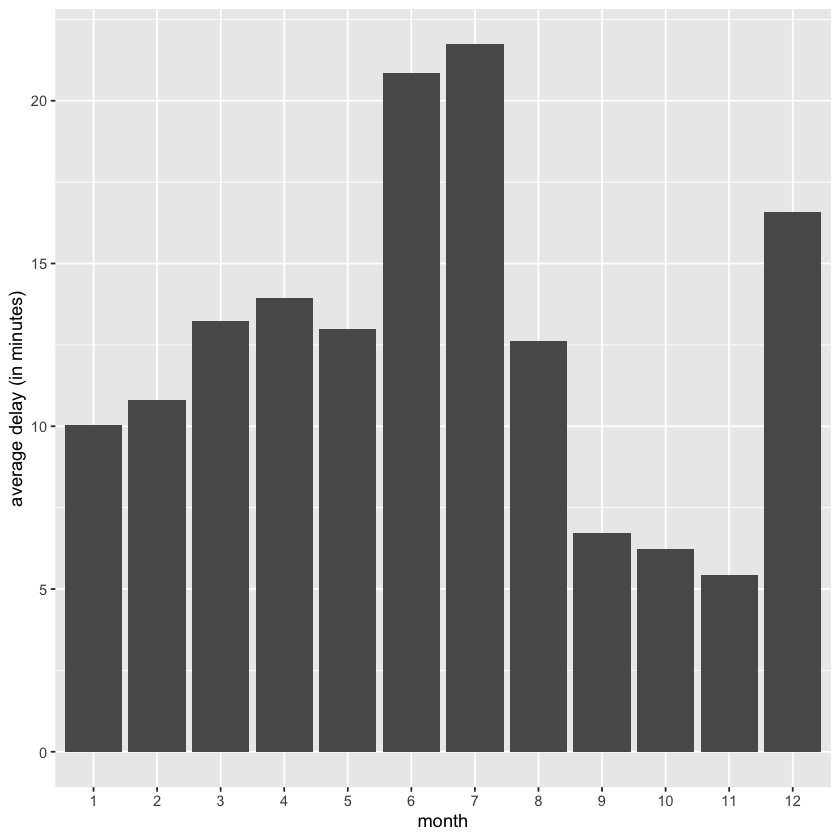

In [8]:
group_by(flights, month) %>%
    summarize(delay = mean(dep_delay, na.rm = TRUE)) %>%
    ggplot() +
        geom_bar(mapping = aes(x=factor(month), y=delay), stat = "identity") +
        labs(x = "month", y = "average delay (in minutes)")

How about a bar chart of mean arrival delay by destination airport for the top 10 airports that have the highest traffic volume?  We will use `group_by`, `summarize`, `arrange`, `slice`, and `ggplot`.

`summarise()` ungrouping output (override with `.groups` argument)



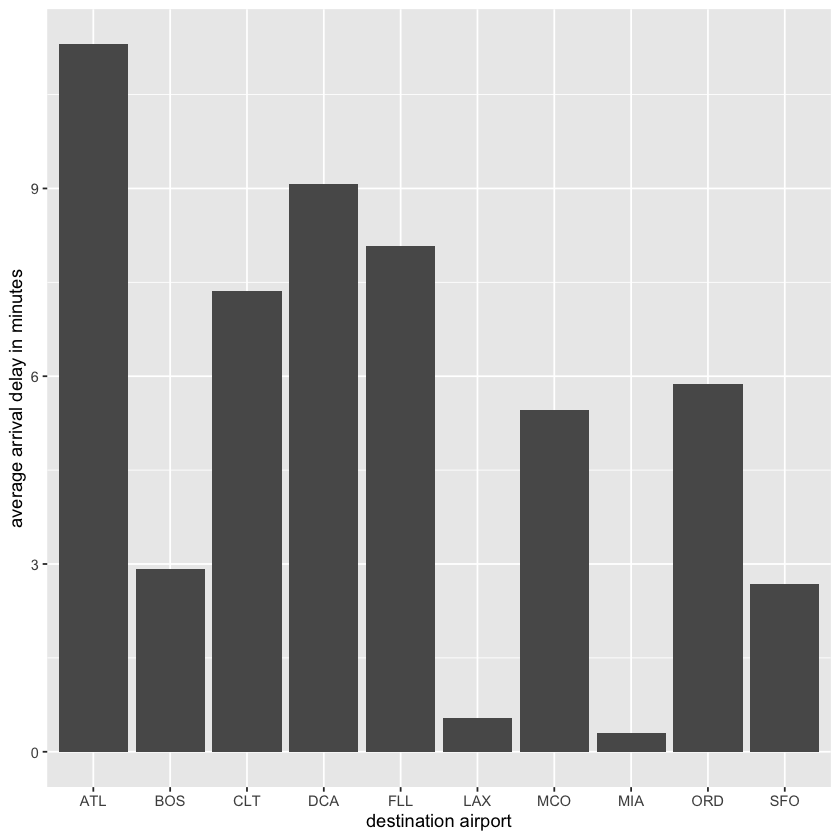

In [62]:
flights %>% 
group_by( dest) %>%
    summarize(
                mean_delay = mean(arr_delay, na.rm=TRUE),
                count = n()
            ) %>%
    arrange(desc(count)) %>%
    slice(1:10) %>%
    ggplot() +
        geom_bar(mapping = aes(x = dest, y = mean_delay), stat = "identity") +
        xlab("destination airport") +
        ylab("average arrival delay in minutes")

Now, let us try to get a scatter plot of airport distance vs average arrival delay after grouping by destination airport? We will also superimpose the scatter plot with a smoothed plot

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


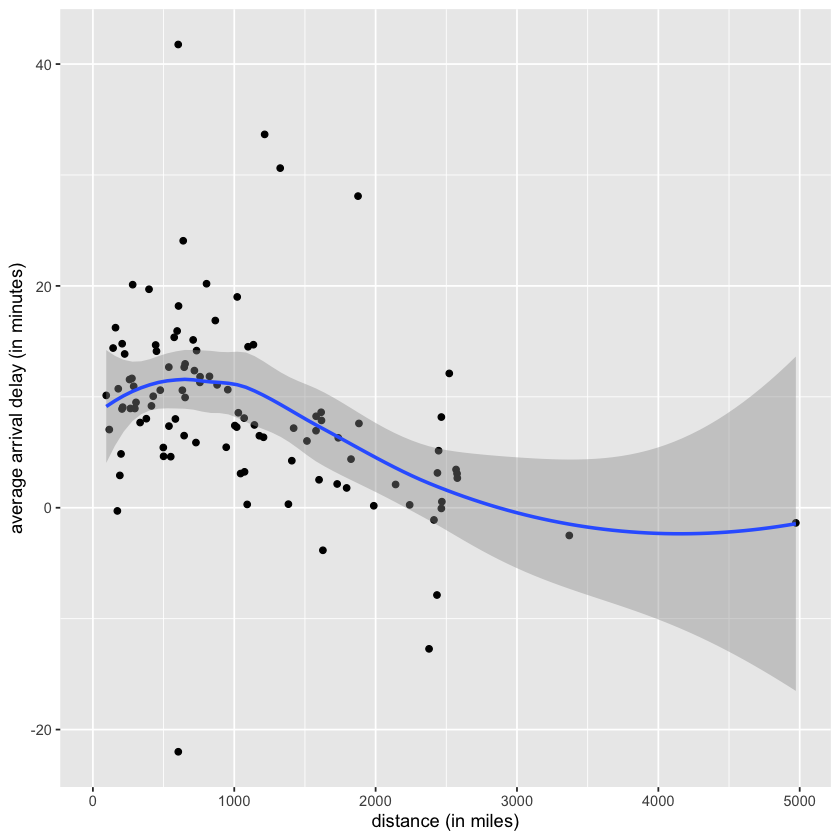

In [11]:
group_by(flights, dest) %>%
    summarize(
                mean_distance = mean(distance, na.rm=TRUE),
                mean_delay = mean(arr_delay, na.rm=TRUE)
            ) %>%
    ggplot(mapping = aes(x = mean_distance, y = mean_delay)) +
        geom_point() +
        geom_smooth() +
        xlab("distance (in miles)") +
        ylab("average arrival delay (in minutes)")

## C.4 Basic operations on data

`R` offers several built-in vectorized functions that can be used to create more complicated function. These include:

* **Arithmetic operators** `+, -, *, /, ^`
* **Modular arithmetic operators** `%/%` and `%%` 
* **Logarithms** `log()`, `log10()`, `log2()`
* **Offsets** `lag()` and `lead()`

We use `/` for a regular division.  For an integer division, we use the code `%/%`, where the fractional part (remainder) is discarded.

In [33]:
4 / 3   
4 %/% 3 

[1] 1.333333

[1] 1

Sometimes we may find the modular operation `%%` useful.  This is outputting the fractional part of a division.  

In [35]:
1%%5 

[1] 1

In [36]:
3%%5

[1] 3

In [37]:
5%%5

[1] 0

In [34]:
1:20 %% 5  # shorter argument 5 is extended to match length of longer argument

[1] 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0

The shorter argument 5 is extended to match length of longer argument

There are also handy functions such as `lag` and `lead`. The function`lag` computes a lagged version of a time series, shifting the time base back by a given number of observations.

In [43]:
(x <- 1:10)
lag(x)
lead(x)

[1]  1  2  3  4  5  6  7  8  9 10

[1] NA  1  2  3  4  5  6  7  8  9

[1]  2  3  4  5  6  7  8  9 10 NA

We also have:

* **Logical comparisons** `==, !=, <, <=, >, >=`
* **Cumulative aggregates** `cumsum(), cumprod(), cummin(), cummax()` (`dplyr` also provides `cummean()`)

In [44]:
5 < 5
1:10 < 11:20
1:10 < 5
21 < 11:20

[1] FALSE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [45]:
(factorials <- cumprod(1:10))
cumsum(1:10)

[1]       1       2       6      24     120     720    5040   40320  362880
[10] 3628800

[1]  1  3  6 10 15 21 28 36 45 55

Sometimes, we want to *rank* our data by assigning integers for 1st place, 2nd place, etc. The functions `dense_rank()`, `min_rank()`, and `row_number()` can be used for this purpose:

In [10]:
gpas = c(3.9, 3.8, 2.7, 3.8, 4.0, 4.0)
dense_rank(gpas)
min_rank(gpas)
row_number(gpas)

[1] 3 2 1 2 4 4

[1] 4 2 1 2 5 5

[1] 4 2 1 3 5 6

Note the differences in behavior: 
- The rankings from `dense_rank()` never have gaps.
- The rankings from `min_rank()` skips over 3rd place (because we have two entries tied for 2nd.)
- The rankings from `row_number()` break ties arbitrarily, so the first 4.0 GPA gets ranked 5th, and the second 4.0 GPA gets ranked 6th.

By default, the ranking functions rank lowest first. If we want to reverse that, and assign rank 1 to the highest entry, we can use the `desc()` function:

In [56]:
dense_rank(desc(gpas))
min_rank(desc(gpas))
row_number(desc(gpas))

[1] 2 3 4 3 1 1

[1] 3 4 6 4 1 1

[1] 3 4 6 5 1 2

In [49]:
(x <- sample(c(11, 12, 12, 14, 14, 14, 17, 21, 26, NA))) # returns a random permutation of the input
min_rank(x) # ranks with smallest value as rank 1
min_rank(desc(x)) # ranks with largest value as rank 1

[1] 14 14 12 12 21 17 26 14 11 NA

[1]  4  4  2  2  8  7  9  4  1 NA

[1]  4  4  7  7  2  3  1  4  9 NA

`summarize()` can be used to summarize entire data frames by collapsing them into single number summaries.


In [57]:
summarize(flights, delay = mean(dep_delay, na.rm = TRUE))

delay
<dbl>
12.63907


In [58]:
by_month <- group_by(flights, month)
(monthly_delays <- summarize(by_month, delay = mean(dep_delay, na.rm = TRUE)))

`summarise()` ungrouping output (override with `.groups` argument)



month,delay
<int>,<dbl>
1,10.036665
2,10.816843
3,13.227076
4,13.938038
5,12.986859
6,20.846332
7,21.727787
8,12.611040
9,6.722476


Many summarization functions are available:

* Center: `mean(), median()`
* Spread: `sd(), IQR(), mad()`
* Range: `min(), max(), quantile()`
* Position: `first(), last(), nth()`
* Count: `n(), n_distinct()`
* Logical: `any(), all()`

Now, let us try to use some of the summarize functions to create a new table with the variables airports, total flights, mean distance, and standard deviation of the distance.  We want to sort the mean distance in descending order.   Let's try to guess which airport has the largest mean distance before we even proceed! 

In [61]:
# airports, total flights, mean distance, and standard deviation of distance
# sorted in descending order of mean distance
group_by(flights, dest) %>%
    summarize(count = n(), sd = sd(distance), mean_distance = mean(distance)) %>%
    arrange(desc(mean_distance)) %>% print()

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 105 x 4
   dest  count    sd mean_distance
   <chr> <int> <dbl>         <dbl>
 1 HNL     707 10.0          4973.
 2 ANC       8  0            3370 
 3 SFO   13331 10.2          2578.
 4 OAK     312  0            2576 
 5 SJC     329  0            2569 
 6 SMF     284  0            2521 
 7 LAX   16174  9.66         2469.
 8 BUR     371  0            2465 
 9 LGB     668  0            2465 
10 PDX    1354  9.88         2446.
# … with 95 more rows
